# Human Activity Recognition Using Smartphone Data

### 1. Importing Important Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

#dim reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#crossvalidation model
from sklearn.model_selection import RandomizedSearchCV

#ml models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#for evaluation of how model is working

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 2. Loading the Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [9]:
#Count of Each of the Unique Values
train.subject.value_counts()

subject
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: count, dtype: int64

In [4]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 4.3+ MB


### 3. Data Preprocessing

a. Checking for Duplicates

In [12]:
print("Sum of Total duplicate data in tain: ", train.duplicated().sum())
print("Sum of Total duplicate data in test: ", test.duplicated().sum())

Sum of Total duplicate data in tain:  0
Sum of Total duplicate data in test:  0


b. Check for missing values in data

In [15]:
print("Sum of Total missing vaues in train data : ", train.isna().sum().sum())
print("Sum of Total missing vaues in test data : ", test.isna().sum().sum())

Sum of Total missing vaues in train data :  0
Sum of Total missing vaues in test data :  0


c. Check for class imbalance

<Axes: title={'center': 'Barplot of Activity'}, xlabel='count', ylabel='Activity'>

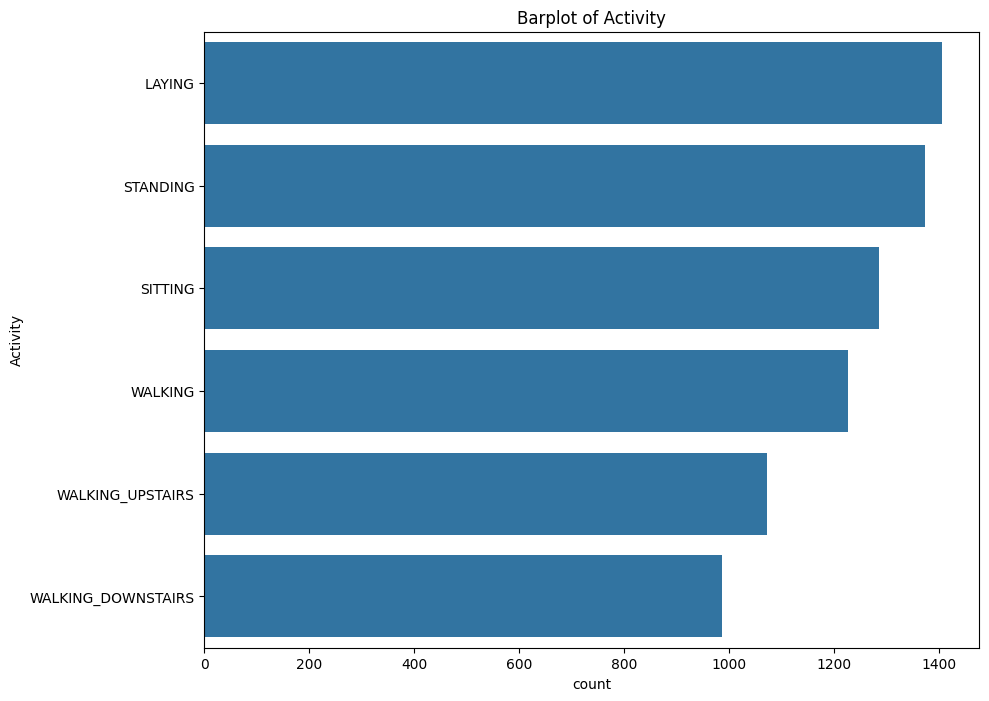

In [19]:
plt.figure(figsize=(10,8))
plt.title("Barplot of Activity")
sns.countplot(train.Activity, order=train.Activity.value_counts().index)

**There is almost same number of observations across all six activities so data does not have class imbalance problem.**

### 4. Exploratory Data Analysis

In [20]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [23]:
"tBodyAcc-mean()-X".split("-")[0].split('(')

['tBodyAcc']

In [37]:
# To get information about accelerometer and gyrometer we have in dataset
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] 
                                for col in train.columns]), 
                                orient= "index").rename(columns= {0:'Count'}).sort_values('Count', ascending=False)

,Count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


a. Analyzing the tBodyAccMag-mean feature

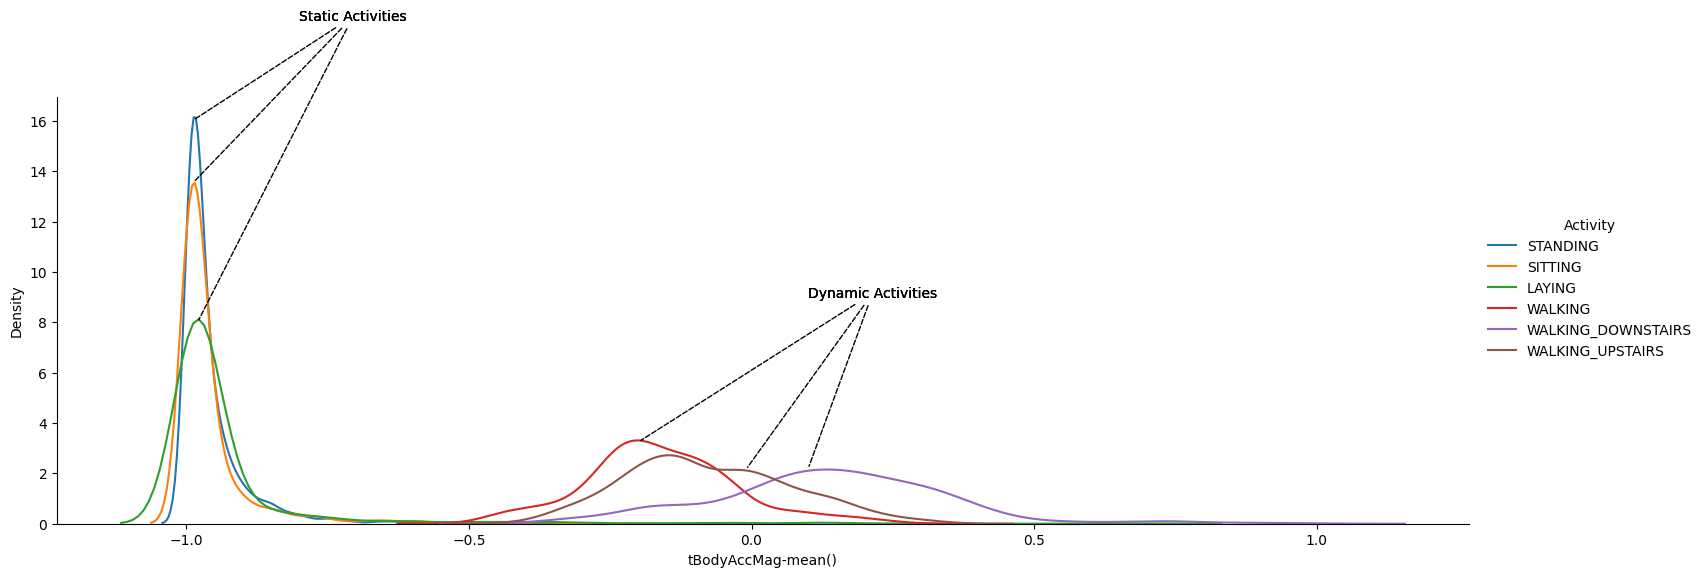

In [61]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy=(-0.98, 8), xytext=(-.8, 20), arrowprops={'arrowstyle': '-', 'ls': "dashed"})
plt.annotate("Static Activities", xy=(-0.99, 13.5), xytext=(-.8, 20), arrowprops={'arrowstyle': '-', 'ls': "dashed"})
plt.annotate("Static Activities", xy=(-0.99, 16), xytext=(-.8, 20), arrowprops={'arrowstyle': '-', 'ls': "dashed"})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

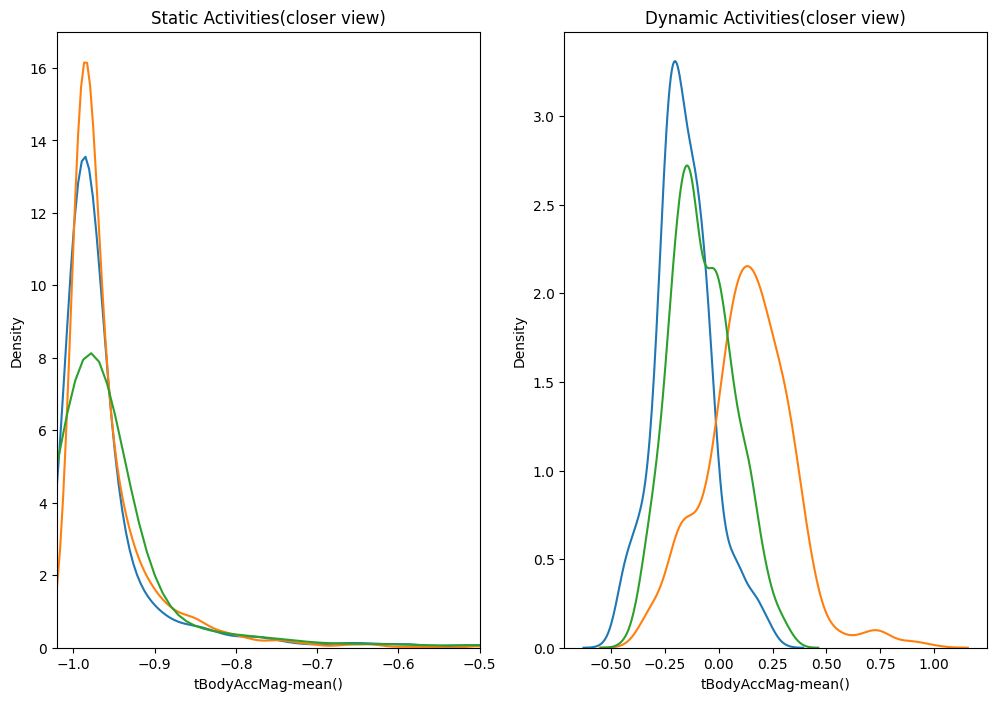

In [63]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)

plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])


plt.subplot(1,2,2)

plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')


plt.show()

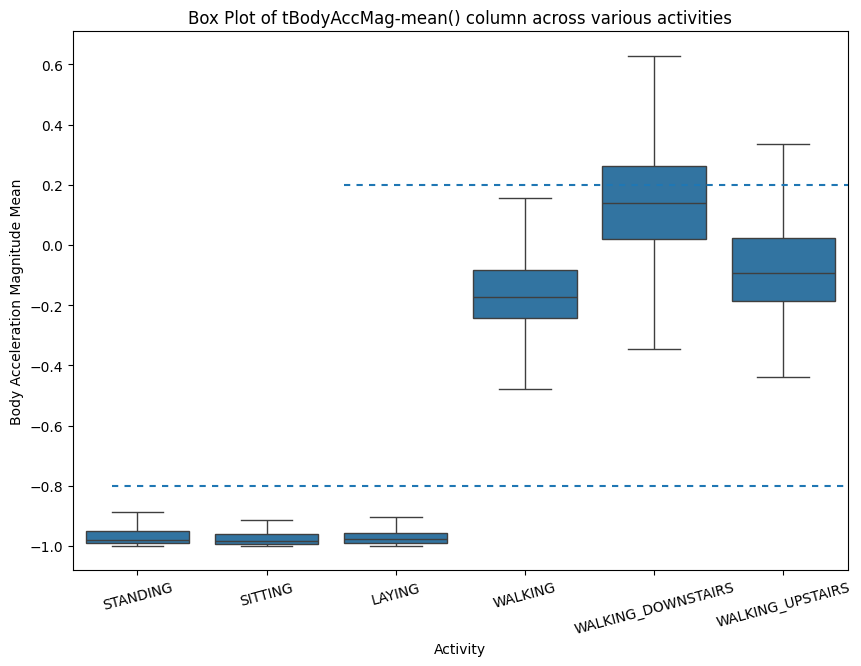

In [80]:
plt.figure(figsize=(10,7))
sns.boxplot(x= "Activity", y= "tBodyAccMag-mean()", data=train, showfliers = False)
plt.ylabel("Body Acceleration Magnitude Mean")
plt.title("Box Plot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-.8, xmin= .05, dashes= (3,3))
plt.axhline(y=0.2, xmin= .35, dashes= (3,3))
plt.xticks(rotation = 15)
plt.show()

b. Analysing Angle between X-axis and gravityMean feature

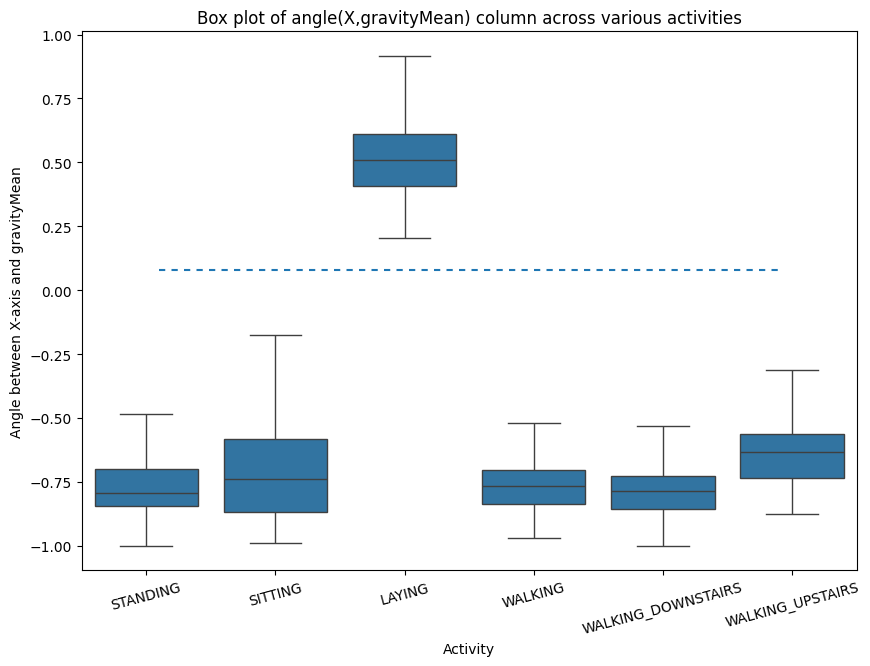

In [81]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 15)
plt.show()

c. Analysing Angle between Y-axis and gravityMean feature

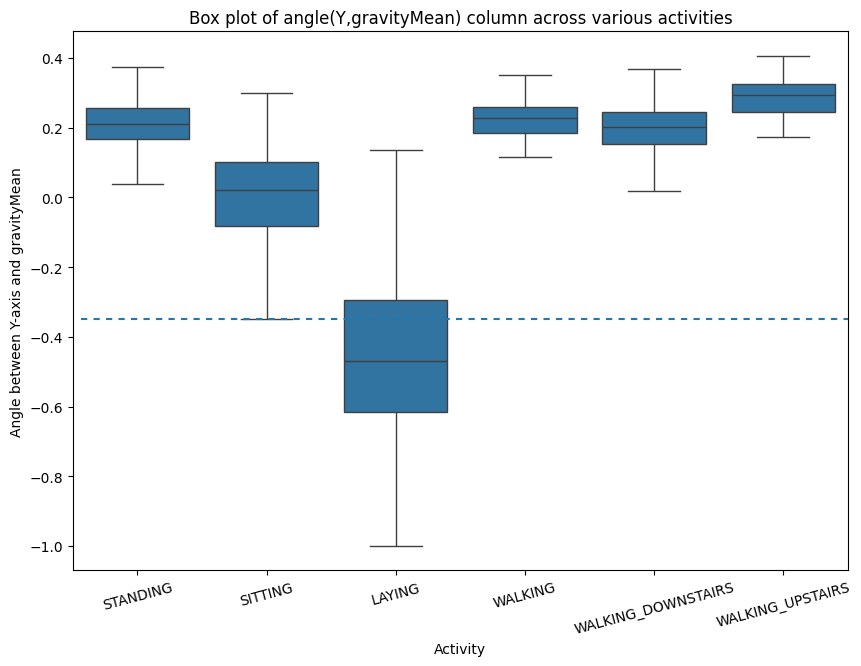

In [83]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 15)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

d. Visualizing data using PCA (Principal Component Analysis)

Using PCA data can be visualized from a extremely high dimensional space to a low dimensional space (dimentionality reduction) and still it retains lots of actual information. Given training data has 561 unqiue features, using PCA let's visualize it to a 2D space.

In [87]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [88]:
pca

array([[-5.5202803 ,  0.29027752],
       [-5.53534954,  0.08253025],
       [-5.47498801, -0.28738705],
       ...,
       [ 5.85750527,  3.08184349],
       [ 5.42109482,  3.42643018],
       [ 5.49797027,  2.78992873]])

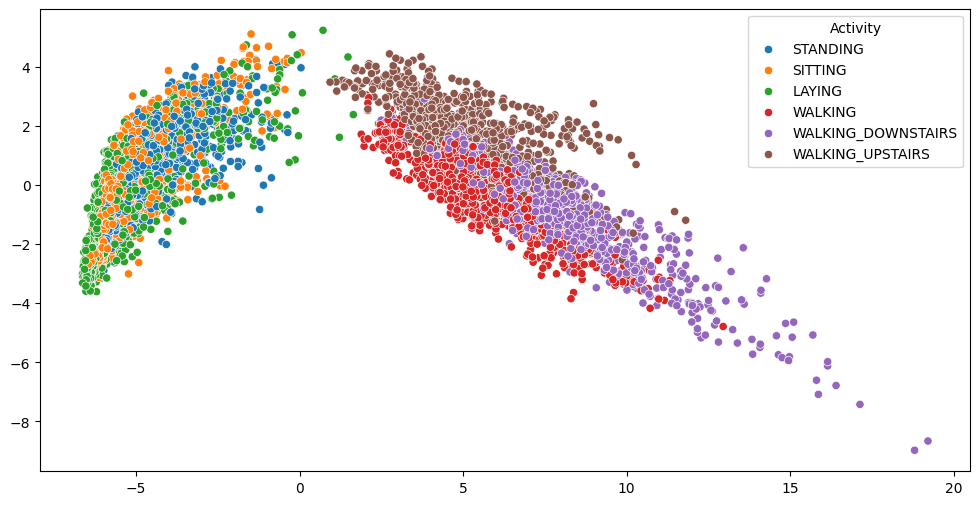

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=pca[:, 0],y= pca[:, 1], hue = train['Activity'])
plt.show()

e. Visualizing data using t-SNE

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [100]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [101]:
tsne

array([[ -6.7651987,  63.033962 ],
       [-25.8846   ,  17.053577 ],
       [-27.491957 ,  20.178698 ],
       ...,
       [ 23.711573 ,  60.58111  ],
       [ 23.71016  ,  60.322895 ],
       [ 24.244934 ,  59.575836 ]], dtype=float32)

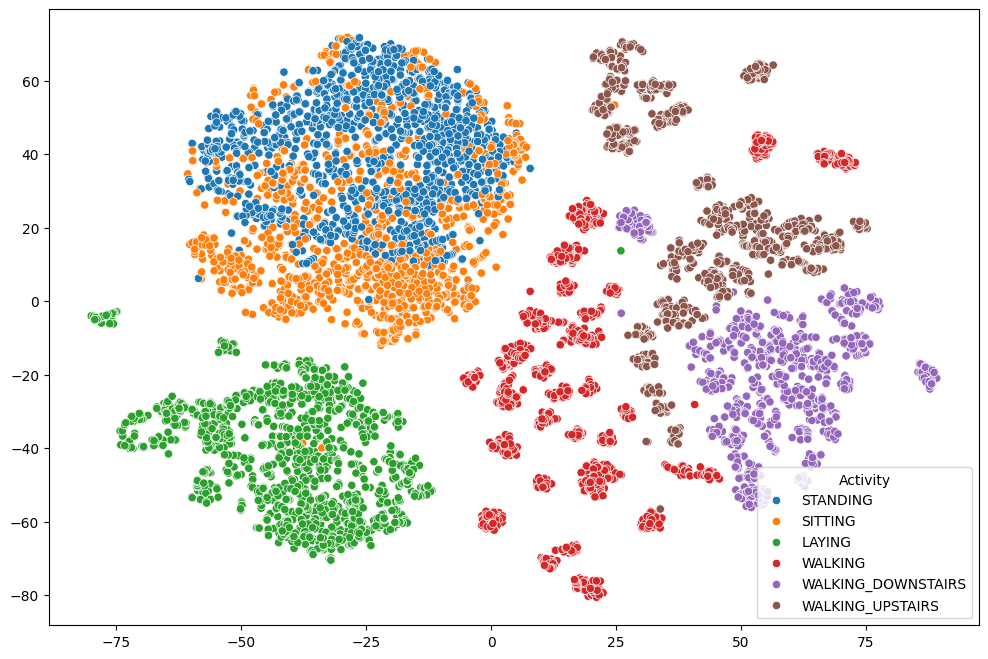

In [103]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])
plt.show()

### 5. ML Models

Getting training and test data ready

In [104]:
x_train = train.drop(['subject', "Activity"], axis=1)
y_train = train.Activity

x_test = test.drop(['subject', "Activity"], axis=1)
y_test = test.Activity

In [106]:
print('Training data size : ', x_train.shape)
print('Test data size : ', x_test.shape)

Training data size :  (7352, 561)
Test data size :  (999, 561)


**a. Logistic Regression model with Hyper-paramerter Tuning and Cross - Validation**

In [109]:
parameters = {'max_iter': [100, 200, 500]}

lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters ,cv=5, random_state= 42)

lr_classifier_rs.fit(x_train, y_train)

y_predict_lr = lr_classifier_rs.predict(x_test)

In [145]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_predict_lr)
print('Accuracy of logestic regression model : ', lr_accuracy)

Accuracy of logestic regression model :  0.954954954954955


In [146]:
cm = confusion_matrix(y_test.values, y_predict_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   9, 169,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]])

In [151]:
#plotting confusion matrix with the help of function

def plot_confusion_matrix(cm, labels, figsize=(12, 8)):
    fig, ax = plt.subplots(figsize=figsize) 
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), 
           xticklabels=labels, yticklabels=labels, 
           ylabel='True Labels', xlabel='Predicted Labels')
    plt.xticks(rotation=45)
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

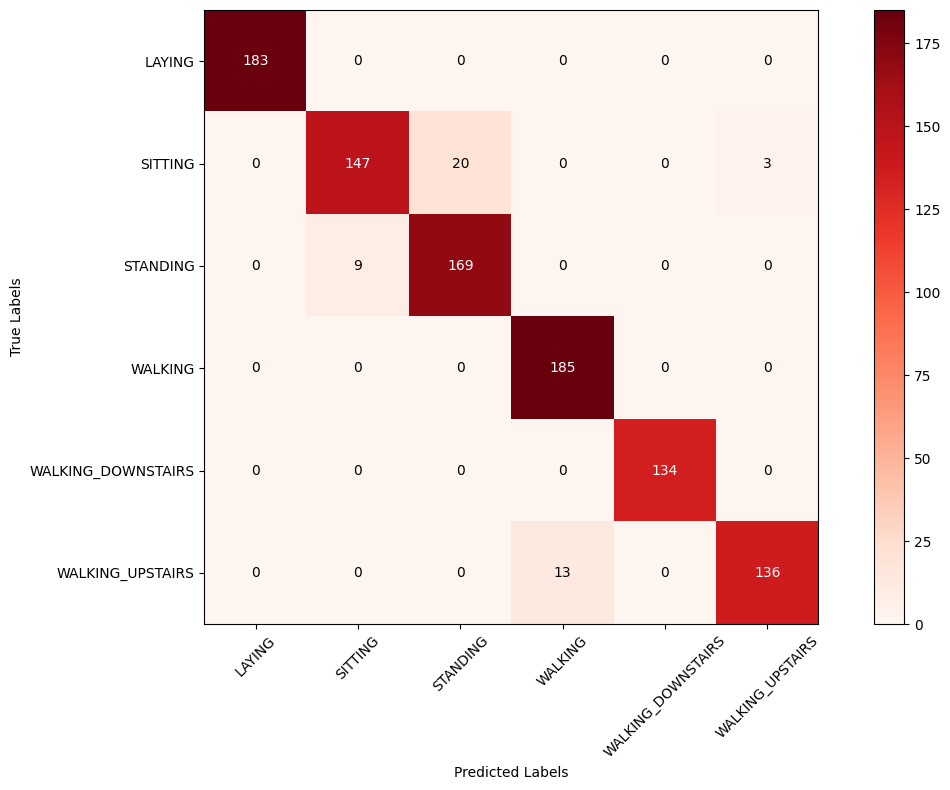

In [152]:
cm = confusion_matrix(y_test.values, y_predict_lr)
plot_confusion_matrix(cm, np.unique(y_predict_lr))

In [153]:
#Best Random Search Attribute
def best_random_search_results(model):
    print('Best Score : ', model.best_score_)
    print('Best Parameters : ', model.best_params_)
    print('Best Estimator : ', model.best_estimator_)
    

In [154]:
best_random_search_results(lr_classifier_rs)

Best Score :  0.9368954434255008
Best Parameters :  {'max_iter': 500}
Best Estimator :  LogisticRegression(max_iter=500)


**b. Kernel SVM model with Hyperparameter tuning and cross validation**

In [163]:
parameters = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [100, 50]
}
svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv=5, random_state=42)
svm_rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [164]:
y_pred = svm_rs.predict(x_test)

In [165]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.9679679679679679


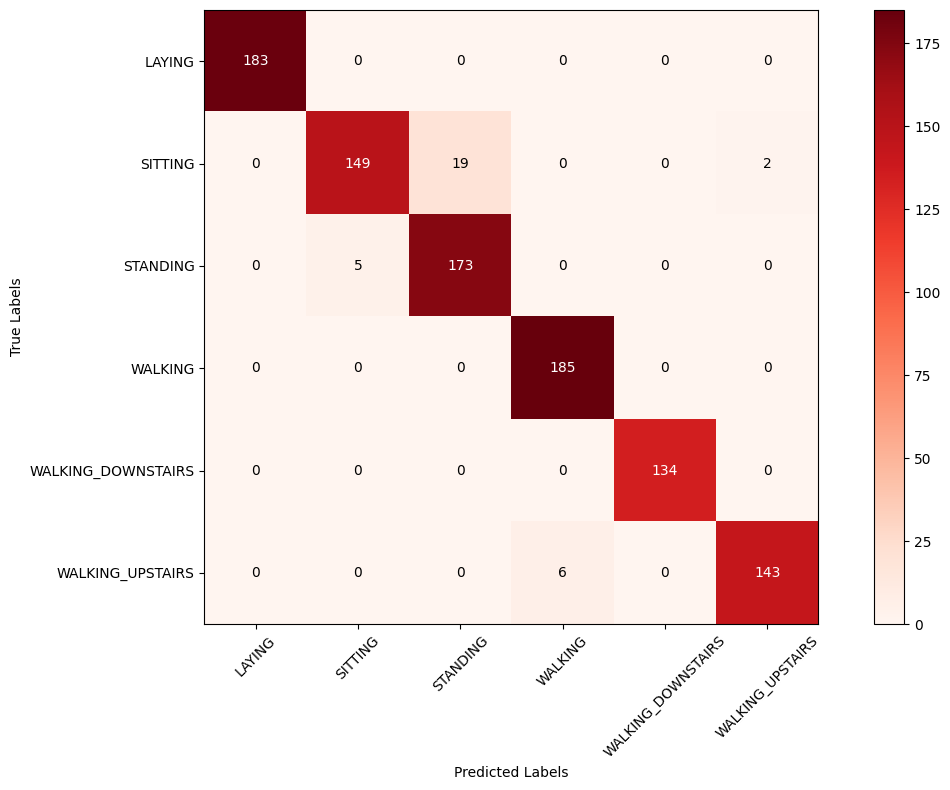

In [166]:
cm = confusion_matrix(y_test.values, y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [167]:
best_random_search_results(svm_rs)

Best Score :  0.9453280428418818
Best Parameters :  {'kernel': 'rbf', 'C': 100}
Best Estimator :  SVC(C=100)


**c. Decision tree model with Hyperparameter tuning and cross validation**

In [169]:
parameters = {'max_depth': np.arange(2, 10, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42)
dt_classifier_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [170]:
y_pred = dt_classifier_rs.predict(x_test)

In [171]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8538538538538538


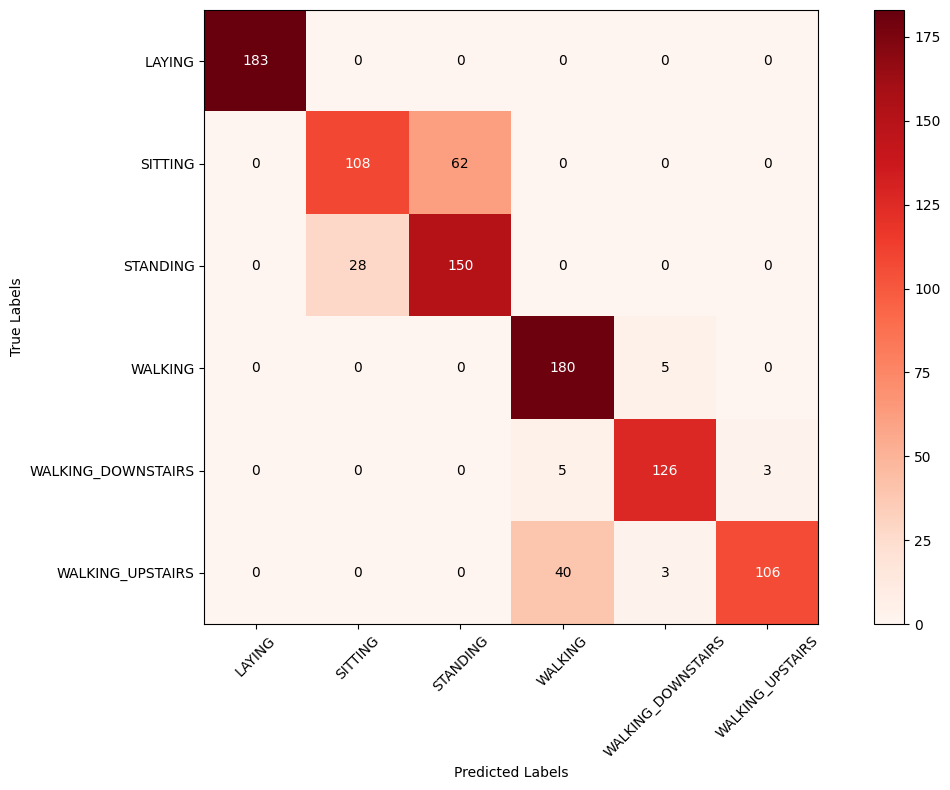

In [172]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [175]:

# getting best random search attributes
best_random_search_results(dt_classifier_rs)

Best Score :  0.8550136193158433
Best Parameters :  {'max_depth': 8}
Best Estimator :  DecisionTreeClassifier(max_depth=8)


**d. Random forest model with Hyperparameter tuning and cross validation**

In [177]:
parameters = {
    'n_estimators':np.arange(20, 101, 10), 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42)
rf_classifier_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [178]:
# getting best random search attributes
best_random_search_results(rf_classifier_rs)

Best Score :  0.9196177342452957
Best Parameters :  {'n_estimators': 70, 'max_depth': 12}
Best Estimator :  RandomForestClassifier(max_depth=12, n_estimators=70)


In [179]:
y_pred = rf_classifier_rs.predict(x_test)

In [180]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9219219219219219


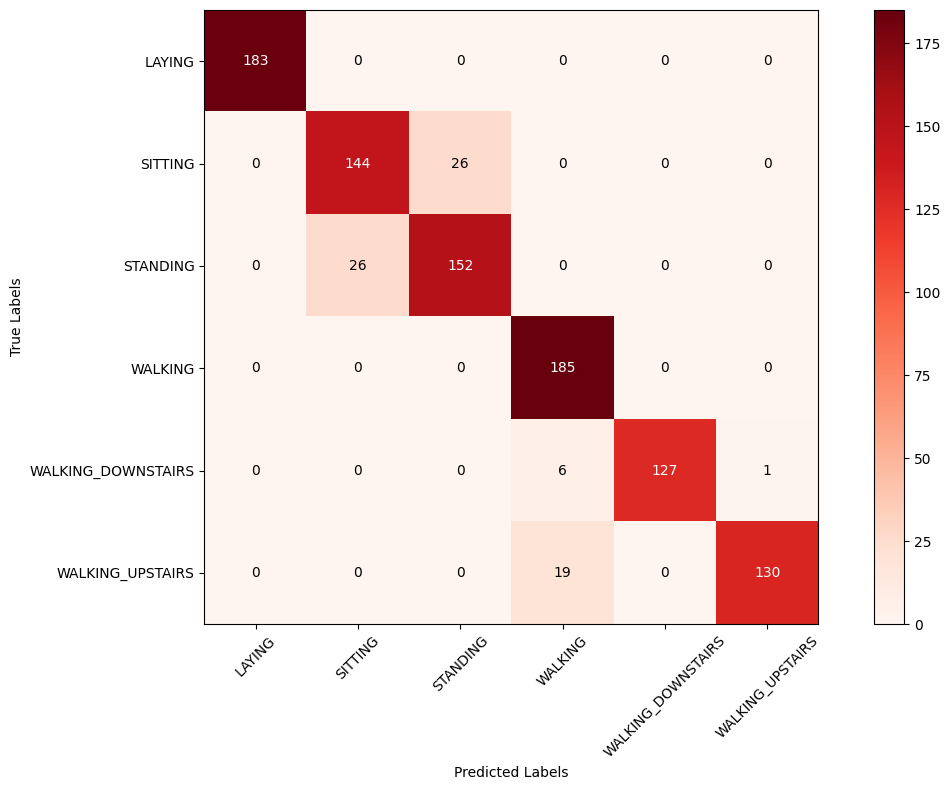

In [181]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))